<a href="https://colab.research.google.com/github/sl202194dsdj/supply_chain_analytics/blob/master/cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pwd

/content


In [3]:
!ls

drive  sample_data


In [2]:
#Install deep learning libs
!pip install tensorflow-gpu

     |████████████████████████████████| 516.2MB 33kB/s 


In [4]:
!pip install mlxtend==0.17.0

In [36]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Flatten, Dense, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
print(tf.__version__)

2.2.0


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
from sklearn.model_selection import train_test_split

In [0]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Get Data

In [7]:
#Get data
df = pd.read_csv('/content/drive/My Drive/back_order_predictor_v2/derived_data/train_data_abt.csv')
df.shape

(2521286, 9)

In [8]:
df.head()

,national_inv,in_transit_qty,sales_1_month,pieces_past_due,potential_issue_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes,backorder
0,-0.005243,1.938134,1.458893,-0.127225,-0.023405,-0.012521,-0.367299,0.159142,0
1,-0.066974,-0.512815,1.286355,-0.127225,-0.023405,-0.012521,-0.367299,0.159142,0
2,1.043200,1.992982,1.696634,-0.127225,-0.023405,-0.012521,-0.367299,0.159142,0
3,0.148776,1.938134,1.154579,-0.127225,-0.023405,-0.012521,-0.367299,0.159142,0
4,-0.061233,-0.512815,-0.816526,-0.127225,-0.023405,-0.012521,-0.367299,0.159142,1


In [10]:
#Sample data to manage training time
data = df.sample(frac=0.001, random_state=7)
print(data.shape)

(2521, 9)


In [23]:
X = data.drop(["backorder"], axis = 1)
y= data.backorder
print(X.shape, y.shape)

(2521, 8) (2521,)


In [24]:
#Split data
#Train, test split
#Set stratify = yes so we can ensre same ratio of target instances
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 7, stratify=y)
print(X_train.shape, X_test.shape)

(2016, 8) (505, 8)


In [25]:
X_train

,national_inv,in_transit_qty,sales_1_month,pieces_past_due,potential_issue_Yes,oe_constraint_Yes,ppap_risk_Yes,stop_auto_buy_Yes
619055,-0.064108,-0.512815,0.140174,-0.127225,-0.023405,-0.012521,-0.367299,0.159142
1884853,-0.057586,-0.512815,1.206440,-0.127225,-0.023405,-0.012521,-0.367299,0.159142
1633313,-0.063027,-0.512815,0.140174,-0.127225,-0.023405,-0.012521,-0.367299,0.159142
682793,-0.062089,1.093342,-0.816526,-0.127225,-0.023405,-0.012521,-0.367299,0.159142
56776,0.234507,2.128142,-0.816526,-0.127225,-0.023405,-0.012521,-0.367299,0.159142
...,...,...,...,...,...,...,...,...
476332,0.610161,2.126787,1.744838,-0.127225,-0.023405,-0.012521,-0.367299,0.159142
2333256,-0.064108,-0.512815,-0.816526,-0.127225,-0.023405,-0.012521,-0.367299,0.159142
1174094,-0.013335,2.096272,1.682738,-0.127225,-0.023405,-0.012521,-0.367299,0.159142
637593,-0.061233,-0.512815,0.140174,-0.127225,-0.023405,-0.012521,-0.367299,0.159142


In [0]:
#Create list of classes
classes_name = ['backorder', 'not_backorder']

In [27]:
#Sanity check our data is already standardized (Standardization is necessary to train a cnn)
X_train.max

<bound method DataFrame.max of          national_inv  in_transit_qty  sales_1_month  pieces_past_due  \
619055      -0.064108       -0.512815       0.140174        -0.127225   
1884853     -0.057586       -0.512815       1.206440        -0.127225   
1633313     -0.063027       -0.512815       0.140174        -0.127225   
682793      -0.062089        1.093342      -0.816526        -0.127225   
56776        0.234507        2.128142      -0.816526        -0.127225   
...               ...             ...            ...              ...   
476332       0.610161        2.126787       1.744838        -0.127225   
2333256     -0.064108       -0.512815      -0.816526        -0.127225   
1174094     -0.013335        2.096272       1.682738        -0.127225   
637593      -0.061233       -0.512815       0.140174        -0.127225   
2111262     -0.057474       -0.512815       1.345558        -0.127225   

         potential_issue_Yes  oe_constraint_Yes  ppap_risk_Yes  \
619055             -0.0234

In [0]:
#Convert y_train, and y_test to numpy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Reshape Data

Not that a cnn must take a 3 dimensional input during training

Since our training data is currently in 2 dimensions, we'll reshape it to 3 dimensions as below:

In [29]:
X_train.shape

(2016, 8)

In [0]:
#Reshaping
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [31]:
#Sanity check we have 3 dimensional data
print(X_train.shape, X_test.shape)

(2016, 8, 1) (505, 8, 1)


Now the reshaping is done, we're ready to build our cnn as below

# CNN Model Building

Building a cnn model requires:

  1. A sequential object, i.e. sequential
  2. Add the convulutional, flattern, and dense layers



In [0]:
'''Define first layer'''
#Define number of epochs
epochs = 20
#Get sequential object
model = Sequential()
#Add conv, flat, and dens layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape= X_train[0].shape))
#Add batch normalization
model.add(BatchNormalization())
#Add dropout
model.add(Dropout(0.2)) #Twenty percent of nuerons will be dropped after first layer


'''Define second layer'''
#Add conv, flat, and dens layers
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
#Add batch normalization
model.add(BatchNormalization())
#Add dropout
model.add(Dropout(0.5)) #Fifty percent of nuerons will be dropped after second layer

#Convert our multidimensional data into a vector with a flattening layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) #Using sigmoid because we have a binary classification roblem

In [35]:
#Get model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 7, 32)             96        
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 32)             128       
_________________________________________________________________
dropout (Dropout)            (None, 7, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6, 64)             4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 6, 64)             256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 384)              

We see that we get a total of 29,345 parameters

Let's compile our model

In [0]:
#Compile model
model.compile(optimizer=Adam(lr=0.0001), loss= 'binary_crossentropy', metrics= ['accuracy'])

Now our model has been compiled, we can proceed with the training step

# Model Training

In [43]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data= (X_test, y_test), 
                    verbose=1)

Epoch 1/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6043 - accuracy: 0.6974 - val_loss: 0.6036 - val_accuracy: 0.7287
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 0.6070 - accuracy: 0.7034 - val_loss: 0.6017 - val_accuracy: 0.7287
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6113 - accuracy: 0.6974 - val_loss: 0.6016 - val_accuracy: 0.7287
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6124 - accuracy: 0.6974 - val_loss: 0.6008 - val_accuracy: 0.7267
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.6006 - accuracy: 0.7083 - val_loss: 0.6009 - val_accuracy: 0.7267
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.6091 - accuracy: 0.6959 - val_loss: 0.5998 - val_accuracy: 0.7267
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6011 - accuracy: 0.6969 - val_loss: 0.5988 - val_accuracy: 0.7267
Epoch 8/20
63/63 [==

Because at 20 epochs our validation accuracy is 72.48% while our training accuracy is 66.12%  (lower than validation ccuracy), we do not appear to be overfitting

Let's increase the number of epochsto 50 and observe performance

In [39]:
history = model.fit(X_train, y_train, epochs=50, validation_data= (X_test, y_test), 
                    verbose=1)

Epoch 1/50
63/63 [==============================] - 0s 6ms/step - loss: 0.6993 - accuracy: 0.6498 - val_loss: 0.6048 - val_accuracy: 0.7248
Epoch 2/50
63/63 [==============================] - 0s 6ms/step - loss: 0.6607 - accuracy: 0.6781 - val_loss: 0.6039 - val_accuracy: 0.7248
Epoch 3/50
63/63 [==============================] - 0s 5ms/step - loss: 0.6820 - accuracy: 0.6602 - val_loss: 0.6067 - val_accuracy: 0.7248
Epoch 4/50
63/63 [==============================] - 0s 6ms/step - loss: 0.6675 - accuracy: 0.6701 - val_loss: 0.6070 - val_accuracy: 0.7248
Epoch 5/50
63/63 [==============================] - 0s 6ms/step - loss: 0.6626 - accuracy: 0.6696 - val_loss: 0.6063 - val_accuracy: 0.7248
Epoch 6/50
63/63 [==============================] - 0s 6ms/step - loss: 0.6529 - accuracy: 0.6761 - val_loss: 0.6054 - val_accuracy: 0.7248
Epoch 7/50
63/63 [==============================] - 0s 5ms/step - loss: 0.6601 - accuracy: 0.6731 - val_loss: 0.6054 - val_accuracy: 0.7267
Epoch 8/50
63/63 [==

We see our accuracy has saturated at around 78% for validation and 68% for training

Let's plot learning curves to ...

# Learning Curve Plots

In [0]:
def plot_learningCurve(history, epoch):
  '''Plots training and validation accuracy values
  '''
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc = 'upper left')
  plt.show()

  '''Plot training and validation loss values
  '''
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'val'], loc = 'upper left')
  plt.show()

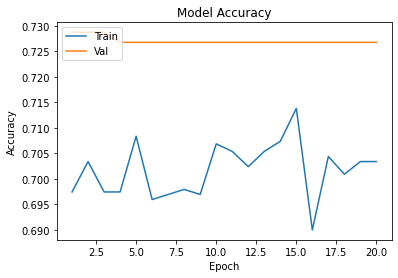

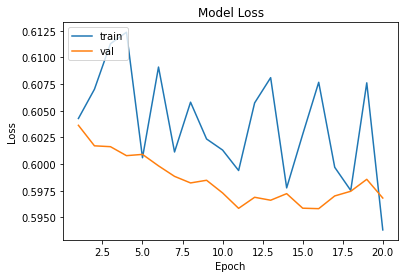

In [54]:
#Ploting the history of learning against epochs
plot_learningCurve(history, epochs)

Since the validation accuracy curve is above the training accuracy curve, our model is not overfitting

We'll add maxpool to understand how our model is getting the accuracy

## Add MaxPool

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 0.9704 - accuracy: 0.5203 - val_loss: 0.6733 - val_accuracy: 0.6376
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 0.8952 - accuracy: 0.5441 - val_loss: 0.6637 - val_accuracy: 0.6099
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8720 - accuracy: 0.5645 - val_loss: 0.6528 - val_accuracy: 0.6931
Epoch 4/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8708 - accuracy: 0.5650 - val_loss: 0.6396 - val_accuracy: 0.7168
Epoch 5/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8501 - accuracy: 0.5764 - val_loss: 0.6235 - val_accuracy: 0.7149
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8287 - accuracy: 0.5794 - val_loss: 0.6089 - val_accuracy: 0.7248
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.8160 - accuracy: 0.5898 - val_loss: 0.5955 - val_accuracy: 0.7248
Epoch 8/20
63/63 [==

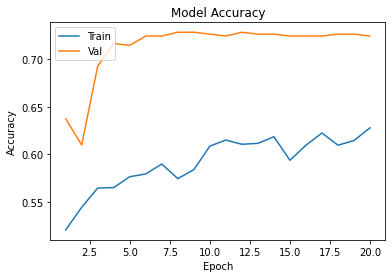

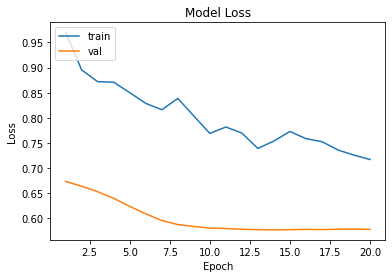

In [55]:
'''Define first layer'''
#Define number of epochs
epochs = 20
#Get sequential object
model = Sequential()
#Add conv, flat, and dens layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape= X_train[0].shape))
#Add batch normalization
model.add(BatchNormalization())
#Add MaxPool
model.add(MaxPool1D(2))
#Add dropout
model.add(Dropout(0.2)) #Twenty percent of nuerons will be dropped after first layer


'''Define second layer'''
#Add conv, flat, and dens layers
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
#Add batch normalization
model.add(BatchNormalization())
#Add MaxPool
model.add(MaxPool1D(2))
#Add dropout
model.add(Dropout(0.5)) #Fifty percent of nuerons will be dropped after second layer

#Convert our multidimensional data into a vector with a flattening layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid')) #Using sigmoid because we have a binary classification roblem

#Compile model
model.compile(optimizer=Adam(lr=0.0001), loss= 'binary_crossentropy', metrics= ['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, validation_data= (X_test, y_test), 
                    verbose=1)
#Ploting the history of learning against epochs
plot_learningCurve(history, epochs)

Since accuracy is still increasing, we can improve our training data to get better performance

As long as validation accuracy is more than training accuracy, adding more data can improve model performance

As long as training and validation accuracy has not saturated, we can increase the nuber of epochs or size of the dataset to improve performance